# Import data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
path = '/home/manos/git/radiomics-features-extraction/'

## Selected features

In [3]:
selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='B', skiprows=[34,35,36,37])
selected_features = selected_features.dropna().values.flatten()
selected_features

array(['volume (voxel counting)', 'Sphericity', 'Surface area (mesh)',
       'Discretised intensity skewness', 'Minimum Intensity',
       'Mean Intensity', 'Maximum Intensity', 'Kurtosis',
       'CLCM correlation', 'GLCM contrast', 'GLCM angular second moment',
       'GLCM joint entropy', 'GLCM difference average',
       'GLCM inverse difference', 'NGTDM coarseness', 'NGTDM contrast',
       'NGTDM busyness', 'GLRLM Short Run Emphasis',
       'GLRLM Long Run Emphasis', 'GLRLM Low Gray Level Run Emphasis',
       'GLRLM High Gray Level Run Emphasis',
       'GLRLM Short Run Low Gray Level Emphasis',
       'GLRLM Short Run High Gray Level Emphasis',
       'GLRLM Long Run Low Gray Level Emphasis',
       'GLRLM Long Run High Gray Level Emphasis',
       'GLRLM Gray Level Non Uniformity',
       'GLRLM Run Length Non Uniformity', 'GLRLM Run Percentage'],
      dtype=object)

## MaZda dataset

In [4]:
mazda_selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='E')
mazda_selected_features = mazda_selected_features.dropna().values.flatten()
mazda_selected_features

array([0, 0, 0, 'Skewness', 0, 'Mean', 0, 'Kurtosis', 'Correlat',
       'Contrast', 'AngScMom', 'Entropy', 0, 'InvDfMom', 0, 0, 0,
       'ShrtREmp', 'LngREmph', 0, 0, 0, 0, 0, 0, 'GLevNonU', 'RLNonUni',
       0], dtype=object)

In [5]:
mazda_first_order_selected_features =  ['Skewness', 'Mean', 'Kurtosis']

mazda_glcm_selected_features = np.array([
 ['S(1,0)AngScMom','S(1,0)Contrast','S(1,0)Correlat','S(1,0)InvDfMom','S(1,0)Entropy'],
 ['S(0,1)AngScMom','S(0,1)Contrast','S(0,1)Correlat','S(0,1)InvDfMom','S(0,1)Entropy'],
 ['S(1,1)AngScMom','S(1,1)Contrast','S(1,1)Correlat','S(1,1)InvDfMom','S(1,1)Entropy'],
 ['S(1,-1)AngScMom','S(1,-1)Contrast','S(1,-1)Correlat','S(1,-1)InvDfMom','S(1,-1)Entropy'],
 ['S(2,0)AngScMom','S(2,0)Contrast','S(2,0)Correlat','S(2,0)InvDfMom','S(2,0)Entropy'],
 ['S(0,2)AngScMom','S(0,2)Contrast','S(0,2)Correlat','S(0,2)InvDfMom','S(0,2)Entropy'],
 ['S(2,2)AngScMom','S(2,2)Contrast','S(2,2)Correlat','S(2,2)InvDfMom','S(2,2)Entropy'],
 ['S(2,-2)AngScMom','S(2,-2)Contrast','S(2,-2)Correlat','S(2,-2)InvDfMom','S(2,-2)Entropy'],
 ['S(3,0)AngScMom','S(3,0)Contrast','S(3,0)Correlat','S(3,0)InvDfMom','S(3,0)Entropy'],
 ['S(0,3)AngScMom','S(0,3)Contrast','S(0,3)Correlat','S(0,3)InvDfMom','S(0,3)Entropy'],
 ['S(3,3)AngScMom','S(3,3)Contrast','S(3,3)Correlat','S(3,3)InvDfMom','S(3,3)Entropy'],
 ['S(3,-3)AngScMom','S(3,-3)Contrast','S(3,-3)Correlat','S(3,-3)InvDfMom','S(3,-3)Entropy'],
 ['S(4,0)AngScMom','S(4,0)Contrast','S(4,0)Correlat','S(4,0)InvDfMom','S(4,0)Entropy'],
 ['S(0,4)AngScMom','S(0,4)Contrast','S(0,4)Correlat','S(0,4)InvDfMom','S(0,4)Entropy'],
 ['S(4,4)AngScMom','S(4,4)Contrast','S(4,4)Correlat','S(4,4)InvDfMom','S(4,4)Entropy'],
 ['S(4,-4)AngScMom','S(4,-4)Contrast','S(4,-4)Correlat','S(4,-4)InvDfMom','S(4,-4)Entropy'],
 ['S(5,0)AngScMom','S(5,0)Contrast','S(5,0)Correlat','S(5,0)InvDfMom','S(5,0)Entropy'],
 ['S(0,5)AngScMom','S(0,5)Contrast','S(0,5)Correlat','S(0,5)InvDfMom','S(0,5)Entropy'],
 ['S(5,5)AngScMom','S(5,5)Contrast','S(5,5)Correlat','S(5,5)InvDfMom','S(5,5)Entropy'],
 ['S(5,-5)AngScMom','S(5,-5)Contrast','S(5,-5)Correlat','S(5,-5)InvDfMom','S(5,-5)Entropy'],
]).T

mazda_glrlm_selected_features = [
 'Horzl_RLNonUni', 'Horzl_GLevNonU', 'Horzl_LngREmph', 'Horzl_ShrtREmp',
 'Vertl_RLNonUni', 'Vertl_GLevNonU', 'Vertl_LngREmph', 'Vertl_ShrtREmp',
]


### Refactor glrlm values

In [6]:
def refactor_glrlm_features(df):
    values = []
    columns = []

    for i in range(4):
        horizl_value = float(df[mazda_glrlm_selected_features[i]])
        vertl_value = float(df[mazda_glrlm_selected_features[i+4]])

        new_col_name = mazda_glrlm_selected_features[i].split('_')[1]
        aggregated_value = (horizl_value + vertl_value) / 2

        columns.append(new_col_name)
        values.append(aggregated_value)

    mazda_glrlm_dataset = pd.DataFrame(values, columns)
    mazda_glrlm_dataset = mazda_glrlm_dataset.T
    
    return mazda_glrlm_dataset

### Refactor glcm values

In [7]:
def refactor_glcm_features(df):
    columns = ['Correlat','Contrast','AngScMom','Entropy','InvDfMom']
    values = []
    correlat_values = []
    contrast_values = []
    angScMom_values = []
    entropy_values = []
    invDfMom_values = []

    for i in range(mazda_glcm_selected_features.shape[0]):
        correlat_values.append(df[mazda_glcm_selected_features[i][2]].values[0])
    values.append(np.mean(correlat_values))

    for i in range(mazda_glcm_selected_features.shape[0]):
        contrast_values.append(df[mazda_glcm_selected_features[i][1]].values[0])
    values.append(np.mean(contrast_values))

    for i in range(mazda_glcm_selected_features.shape[0]):
        angScMom_values.append(df[mazda_glcm_selected_features[i][0]].values[0])
    values.append(np.mean(angScMom_values))

    for i in range(mazda_glcm_selected_features.shape[0]):
        entropy_values.append(df[mazda_glcm_selected_features[i][4]].values[0])
    values.append(np.mean(entropy_values))

    for i in range(mazda_glcm_selected_features.shape[0]):
        invDfMom_values.append(df[mazda_glcm_selected_features[i][3]].values[0])
    values.append(np.mean(invDfMom_values))

    mazda_glcm_dataset = pd.DataFrame(values, columns)
    mazda_glcm_dataset = mazda_glcm_dataset.T

    return mazda_glcm_dataset

In [8]:
def insert_mazda_missing_columns(df):
    df.insert(loc=0, column='volume (voxel counting)', value=0)
    df.insert(loc=1, column='Sphericity', value=0)
    df.insert(loc=2, column='Surface area (mesh)', value=0)
    df.insert(loc=4, column='Minimum Intensity', value=0)
    df.insert(loc=6, column='Maximum Intensity', value=0)
    df.insert(loc=12, column='GLCM difference average', value=0)
    df.insert(loc=14, column='NGTDM coarseness', value=0)
    df.insert(loc=15, column='NGTDM contrast', value=0)
    df.insert(loc=16, column='NGTDM busyness', value=0)
    df.insert(loc=19, column='GLRLM Low Gray Level Run Emphasis', value=0)
    df.insert(loc=20, column='GLRLM High Gray Level Run Emphasis', value=0)
    df.insert(loc=21, column='GLRLM Short Run Low Gray Level Emphasis', value=0)
    df.insert(loc=22, column='GLRLM Short Run High Gray Level Emphasis', value=0)
    df.insert(loc=23, column='GLRLM Long Run Low Gray Level Emphasis', value=0)
    df.insert(loc=24, column='GLRLM Long Run High Gray Level Emphasis', value=0)
    df.insert(loc=27, column='GLRLM Run Percentage', value=0)

    return df

### Mazda export multiple excel files for each patient that we need to preprocess into one file per patient

In [9]:
mazda_output_info = pd.read_json(os.path.join(path, 'MaZda', 'data', 'files.json'))
mazda_output_info.head()

,name,images,rois,reports
0,R01-001,"[R01-001_slice_7.dcm, R01-001_slice_14.dcm, R0...","[R01-001_roi_slice_7.bmp, R01-001_roi_slice_14...","[result_R01-001_roi_slice_7.xls, result_R01-00..."
1,R01-002,"[R01-002_slice_0.dcm, R01-002_slice_6.dcm, R01...","[R01-002_roi_slice_0.bmp, R01-002_roi_slice_6....","[result_R01-002_roi_slice_0.xls, result_R01-00..."
2,R01-003,"[R01-003_slice_0.dcm, R01-003_slice_6.dcm, R01...","[R01-003_roi_slice_0.bmp, R01-003_roi_slice_6....","[result_R01-003_roi_slice_0.xls, result_R01-00..."
3,R01-004,"[R01-004_slice_7.dcm, R01-004_slice_2.dcm, R01...","[R01-004_roi_slice_7.bmp, R01-004_roi_slice_2....","[result_R01-004_roi_slice_7.xls, result_R01-00..."
4,R01-005,"[R01-005_slice_5.dcm, R01-005_slice_10.dcm, R0...","[R01-005_roi_slice_5.bmp, R01-005_roi_slice_10...","[result_R01-005_roi_slice_5.xls, result_R01-00..."


In [10]:
def compose_reports_per_patient(path, reports):
    aggregated_report = {}
    
    for report in reports:
        df = pd.read_table(os.path.join(path, report), skiprows=19)     
        
        # Refactor df before processing
        df.drop(axis=1, labels=df.columns[4:], inplace=True)
        df.drop(axis=1, labels=df.columns[1:3], inplace=True)
        df = df.T
        df.reset_index(inplace=True)
       
        # Reset header
        new_header = df.iloc[0] #grab the first row for the header
        df = df[1:] #take the data less the header row
        df.columns = new_header #set the header row as the df header
        
        # Set indexes
        df.index = np.arange(0, len(df))

        # Get first order features
        mazda_first_order_dataset = df[mazda_first_order_selected_features]
        
        # Refactor GLRLM features
        mazda_glrlm_dataset = refactor_glrlm_features(df)
        
        # Refactor GLCM features
        mazda_glcm_dataset = refactor_glcm_features(df)
        
    series = pd.concat([np.mean(mazda_first_order_dataset), np.mean(mazda_glcm_dataset), np.mean(mazda_glrlm_dataset)], axis=0).to_frame()
    df = pd.DataFrame(series).transpose()
    df = insert_mazda_missing_columns(df)
    
    print('.', end='')
    return df

In [11]:
mazda_dataset = pd.DataFrame([])
for patient_reports in mazda_output_info.iloc[:,-1]:
    mazda_dataset = mazda_dataset.append(compose_reports_per_patient(os.path.join(path, 'MaZda', 'data'), patient_reports))

..............................................................................................................................................

# Cluster the heatmap

Though useful, heatmaps tell a much better story if the features are clustered.  Here we take a smaller subset of the features and cluster.  In the [dendrogram](https://en.wikipedia.org/wiki/Dendrogram), there are 2 major groups, and many smaller groupings based on features. 

In [12]:
# https://stackoverflow.com/questions/21164910/how-do-i-delete-a-column-that-contains-only-zeros-in-pandas
cleaned_dataset = mazda_dataset.loc[:, (mazda_dataset != 0).any(axis=0)]
cleaned_dataset

,Skewness,Mean,Kurtosis,Correlat,Contrast,AngScMom,Entropy,InvDfMom,RLNonUni,GLevNonU,LngREmph,ShrtREmp
0,-0.499648,817.57143,-1.100841,2.337854,2.241987,1.418431,2.476991,3.250579,69.933404,9.650528,2.374841,0.855767
0,-1.890348,33717.45600,2.808938,0.406229,0.412631,0.456749,0.442414,0.428056,35.425877,55.443860,7.258333,0.570782
0,-2.345492,33806.52100,6.644885,0.416953,0.410309,0.443176,0.414836,0.405770,21.038248,34.309401,9.859722,0.552494
0,-2.398113,33796.03700,7.215561,0.478759,0.468697,0.480364,0.425224,0.438280,10.380435,23.583334,12.549819,0.439572
0,-1.448547,956.51366,1.637142,1.057583,0.890173,0.870723,1.106425,0.898916,96.905353,36.383766,4.507961,0.696095
...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.259321,33521.23200,-1.195960,0.475620,0.492029,0.515127,0.478423,0.477523,9.442857,29.214626,21.841156,0.336746
0,-0.435958,773.46495,-0.750720,2.718027,2.283277,1.753914,2.737769,2.330863,1033.108210,93.374690,1.649668,0.881615
0,0.368305,33328.18500,-1.192568,0.466094,0.467188,0.505341,0.462760,0.457930,14.450000,61.940000,56.074000,0.309327
0,0.891351,492.05398,0.079500,4.282631,2.802840,2.912759,5.920337,4.327956,680.773075,63.873968,1.693248,0.874791


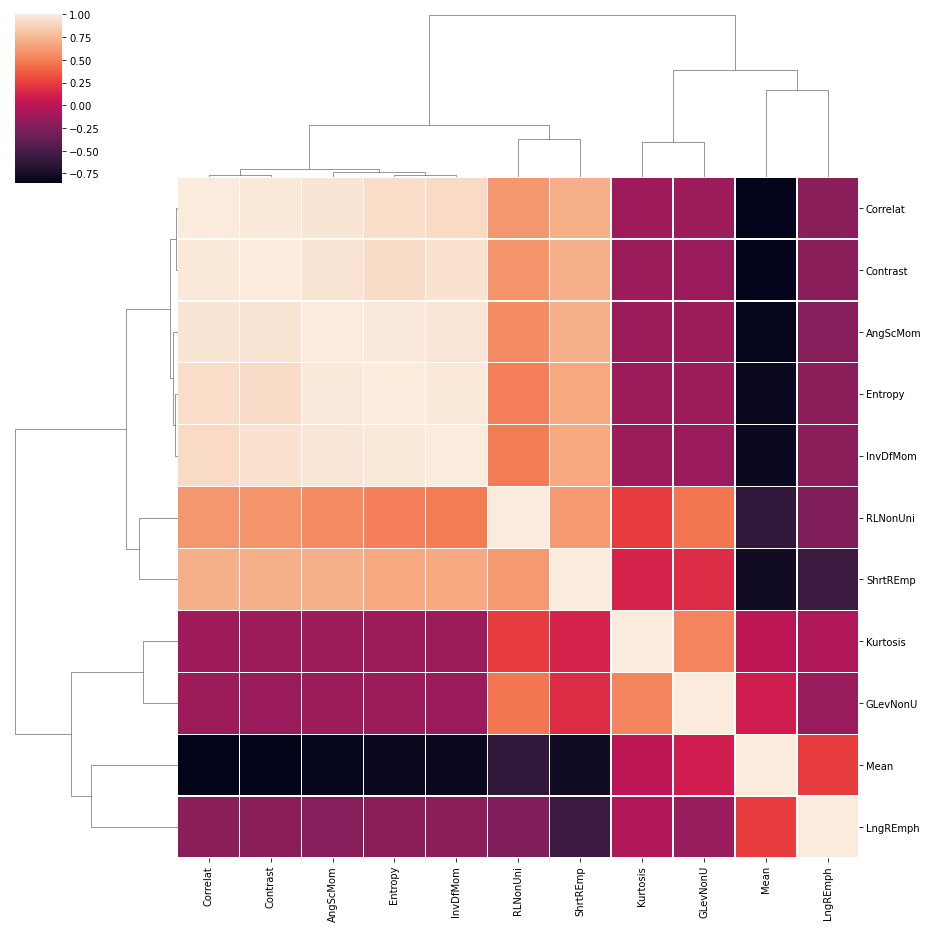

In [13]:
# Choose a subset of features for clustering
dd = cleaned_dataset.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()